In [30]:
# Setup environment
using Pkg
Pkg.add(;name="IceFloeTracker", rev="main")
Pkg.add(["CSVFiles", "DataFrames", "Dates", "Plots"])

    Updating git-repo `https://github.com/WilhelmusLab/IceFloeTracker.jl.git`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [04643c7a] ~ IceFloeTracker v0.9.0 ⇒ v0.9.0 `https://github.com/WilhelmusLab/IceFloeTracker.jl.git#main`
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [f67ccb44] - HDF5 v0.17.2
  [04643c7a] ~ IceFloeTracker v0.9.0 ⇒ v0.9.0 `https://github.com/WilhelmusLab/IceFloeTracker.jl.git#main`
Precompiling project...
   7742.3 ms  ✓ IceFloeTracker
  1 dependency successfully precompiled in 10 seconds. 433 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version. Otherwise, loading dependents of this package may trigger further precompilation to work with the unexpected version.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
using IceFloeTracker
using Images
using Images: segment_mean, labels_map, SegmentedImage, RGB
using IceFloeTracker.Tracking: FloeTracker, FilterFunction, MinimumWeightMatchingFunction
using Plots
using DataFrames

,,,,,,,,,,,,,

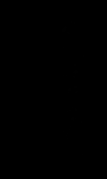
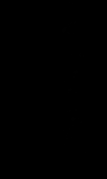
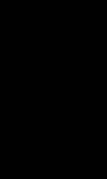
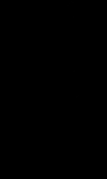
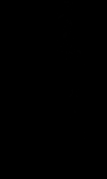
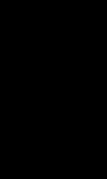
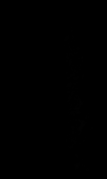
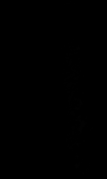
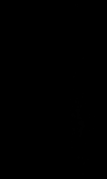
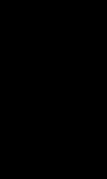
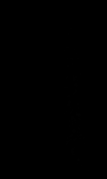
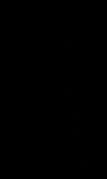
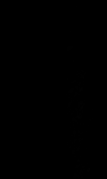
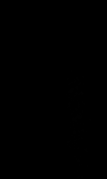

In [4]:
image_loc = "../data/modis_images/fig4/"
files = readdir(image_loc)
image_names = [joinpath(image_loc, f) for f in files if occursin("labeled_clean", f)];
images = load.(image_names)
# images

In [10]:
image_names

14-element Vector{String}:
 "../data/modis_images/fig4/20140424.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140424.terra.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140425.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140425.terra.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140426.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140426.terra.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140427.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140427.terra.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140428.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140428.terra.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140429.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140429.terra.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140430.aqua.labeled_clean.250m.tiff"
 "../data/modis_images/fig4/20140430.terra.labeled_clean.250m.tiff"

In [13]:
segments = SegmentedImage.(images, label_components.(images));

In [12]:
using Dates
passtimes = DateTime.([
            "2014-04-24T12:08:04",
            "2014-04-24T13:25:02",
            "2014-04-25T11:13:01",
            "2014-04-25T14:07:48",
            "2014-04-26T11:55:52",
            "2014-04-26T13:12:44",
            "2014-04-27T12:38:45",
            "2014-04-27T13:55:34",
            "2014-04-28T11:43:40",
            "2014-04-28T13:00:36",
            "2014-04-29T12:26:32",
            "2014-04-29T13:43:33",
            "2014-04-30T11:31:29",
            "2014-04-30T12:48:25"])

14-element Vector{DateTime}:
 2014-04-24T12:08:04
 2014-04-24T13:25:02
 2014-04-25T11:13:01
 2014-04-25T14:07:48
 2014-04-26T11:55:52
 2014-04-26T13:12:44
 2014-04-27T12:38:45
 2014-04-27T13:55:34
 2014-04-28T11:43:40
 2014-04-28T13:00:36
 2014-04-29T12:26:32
 2014-04-29T13:43:33
 2014-04-30T11:31:29
 2014-04-30T12:48:25

In [14]:
tracker = FloeTracker(filter_function=FilterFunction(),
                      matching_function=MinimumWeightMatchingFunction())
tracked = tracker(segments, passtimes);

In [20]:
maximum(tracked[!, :ID])

887

In [22]:
data_columns = [n for n in names(tracked) if n ∉ ["mask", "psi"]];
tracked[!, data_columns] |> save("../data/julia_example_tracked_floes.csv");